In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/csv/Data-1.xlsx')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.duplicated().sum()

220

In [ ]:
df[df.duplicated()==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10593,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10615,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10633,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10671,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


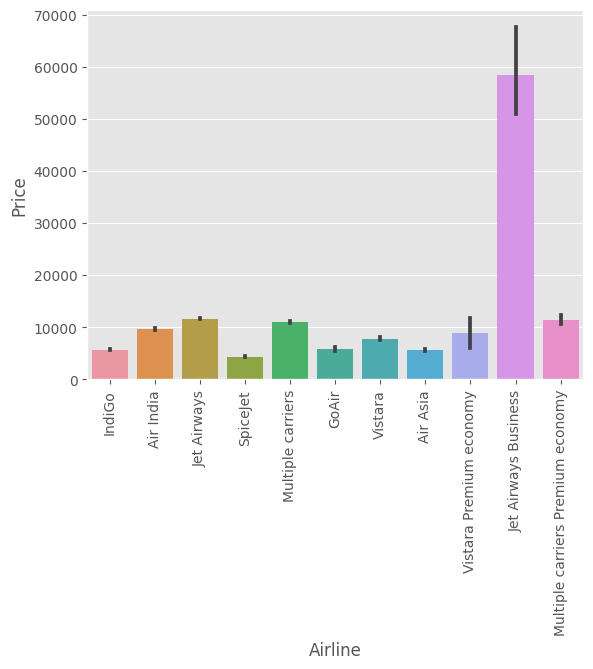

In [ ]:
sns.barplot(data=df, x='Airline',y='Price')
plt.xticks(rotation=90);

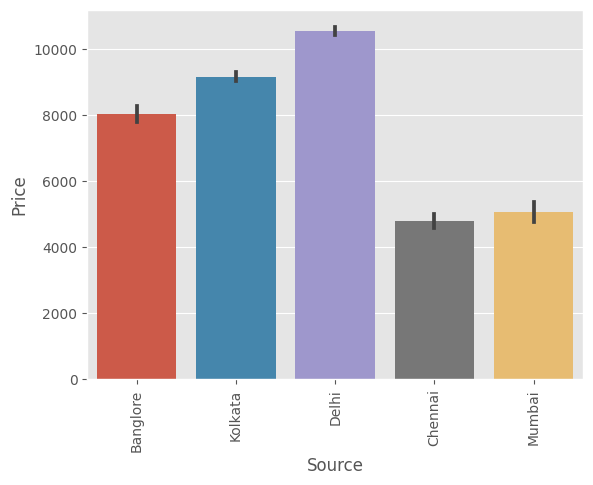

In [ ]:
sns.barplot(data=df, x='Source',y='Price')
plt.xticks(rotation=90);

# Preprocessing

In [ ]:
df.dropna(inplace = True)
print(df.isnull().sum())


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [ ]:
# Date_of_Journey
df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.drop(["Date_of_Journey"], axis = 1, inplace = True)



In [ ]:
# Dep_Time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)




In [ ]:
# Arrival_Time
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
# Duration
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [ ]:
# Adding Duration column to test set
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins
df.drop(["Duration"], axis = 1, inplace = True)

In [ ]:
# Categorical data

print("Airline")
print("-"*75)
print(df["Airline"].value_counts())
Airline = pd.get_dummies(df["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(df["Source"].value_counts())
Source = pd.get_dummies(df["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(df["Destination"].value_counts())
Destination = pd.get_dummies(df["Destination"], drop_first = True)


Airline
---------------------------------------------------------------------------
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64


In [ ]:
# Route and Total_Stops are related to each other
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe  test_data + Airline + Source + Destination
df1 = pd.concat([df, Airline, Source, Destination], axis = 1)

df1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", df1.shape)



Shape of test data :  (10681, 29)


In [ ]:
df1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10681
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10681 non-null  int64
 1   Price                              10681 non-null  int64
 2   Journey_day                        10681 non-null  int64
 3   Journey_month                      10681 non-null  int64
 4   Dep_hour                           10681 non-null  int64
 5   Dep_min                            10681 non-null  int64
 6   Arrival_hour                       10681 non-null  int64
 7   Arrival_min                        10681 non-null  int64
 8   Duration_hours                     10681 non-null  int64
 9   Duration_mins                      10681 non-null  int64
 10  Air India                          10681 non-null  uint8
 11  GoAir                              10681 non-null  uint8
 12  IndiGo            

<Axes: >

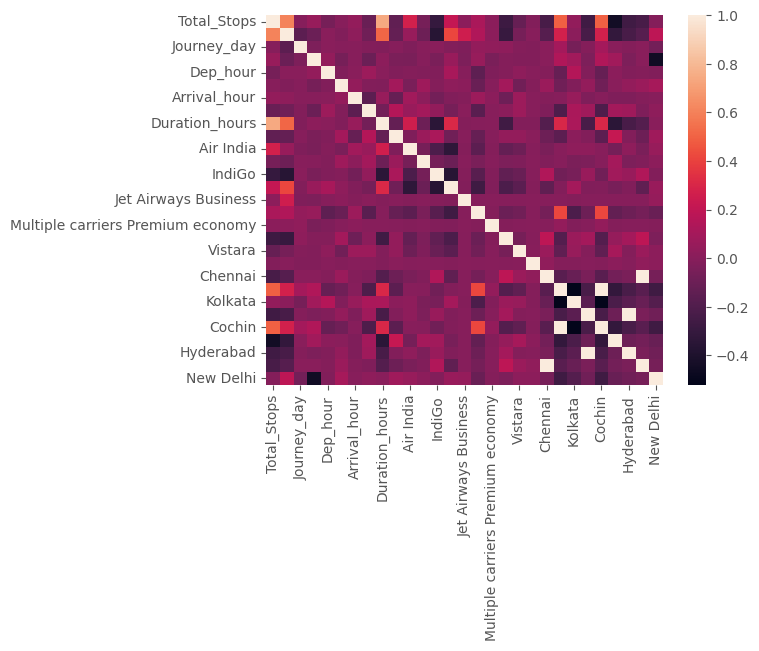

In [ ]:
sns.heatmap(data=df1.corr())

In [ ]:
X = df1.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,1,0,0,0,0,0,0,1,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,1,1,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,1,0,0,0,0,0,0,1,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
Y = df1.iloc[:, 1]
Y.head()


0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.3, random_state=7)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7476, 32)
(3205, 32)
(7476,)
(3205,)


In [ ]:
x_train=preprocessing.normalize(x_train)
x_test=preprocessing.normalize(x_test)

In [ ]:
model=Sequential()

In [ ]:
opt=optimizers.Adam(learning_rate=0.01)

In [ ]:
model.add(Dense(units=50, input_dim=32, kernel_initializer='normal', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=50, kernel_initializer='normal', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=50, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer=opt, metrics='accuracy')

In [ ]:
model.fit(x_train, y_train, batch_size= 32, epochs = 50, verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
234/234 [==============================] - 4s 7ms/step - loss: 46668332.0000 - accuracy: 0.0000e+00 - val_loss: 41288836.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
234/234 [==============================] - 1s 6ms/step - loss: 15254638.0000 - accuracy: 0.0000e+00 - val_loss: 17254560.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
234/234 [==============================] - 1s 6ms/step - loss: 14529329.0000 - accuracy: 0.0000e+00 - val_loss: 19657666.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
234/234 [==============================] - 1s 5ms/step - loss: 13581315.0000 - accuracy: 0.0000e+00 - val_loss: 11534663.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
234/234 [==============================] - 2s 8ms/step - loss: 13734049.0000 - accuracy: 0.0000e+00 - val_loss: 13144895.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
234/234 [==============================] - 2s 8ms/step - loss: 12716284.0000 - accuracy: 0.0000e+00 - val_loss: 10682484.0000 - val_accuracy: 0.0000e+00
Epoch 7/50
234/2

In [ ]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,46668332.0,0.0,41288836.0,0.0
1,15254638.0,0.0,17254560.0,0.0
2,14529329.0,0.0,19657666.0,0.0
3,13581315.0,0.0,11534663.0,0.0
4,13734049.0,0.0,13144895.0,0.0
5,12716284.0,0.0,10682484.0,0.0
6,12373074.0,0.0,10198418.0,0.0
7,12186074.0,0.0,10046560.0,0.0
8,11930032.0,0.0,10061184.0,0.0
9,11320425.0,0.0,9647838.0,0.0


<Axes: >

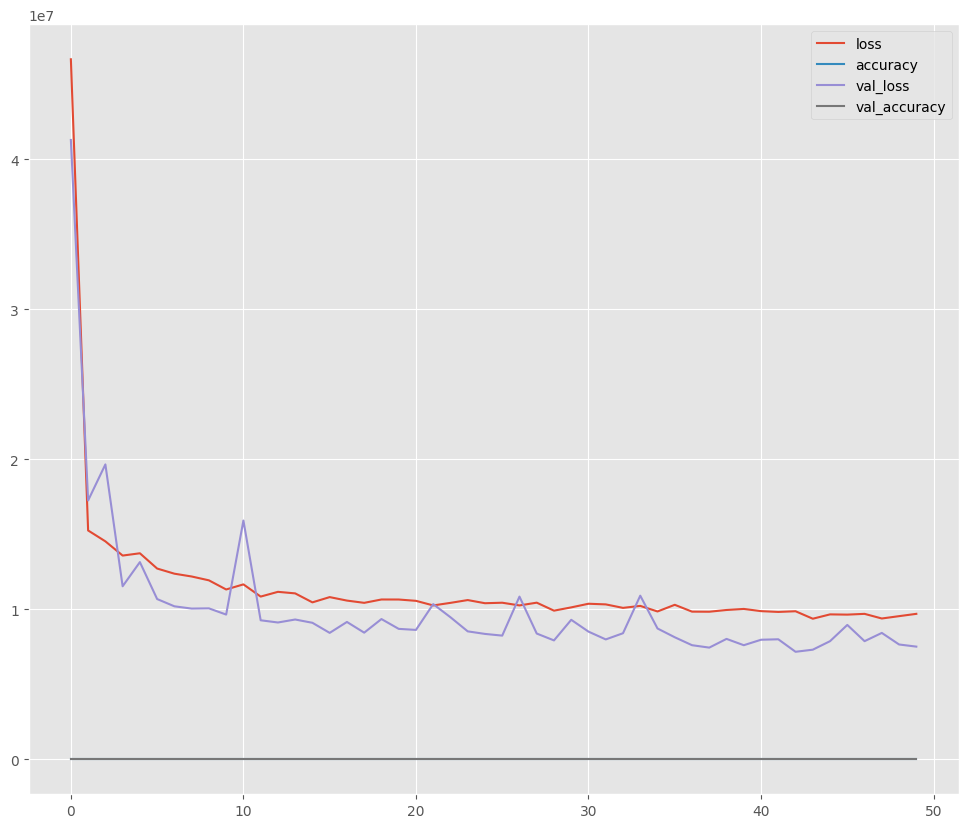

In [ ]:
plt.style.use("ggplot")
pd.DataFrame(model.history.history).plot(figsize=(12,10))

In [ ]:
predictions = model.predict(x_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)

101/101 [==============================] - 0s 1ms/step


In [ ]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 1788.3721905927018
MSE: 7510844.790940766
RMSE: 2740.5920511708355


In [ ]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,predictions)

0.6527378738407228

Part 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import h5py
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/csv/usedcars.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          150 non-null    int64 
 1   model         150 non-null    object
 2   price         150 non-null    int64 
 3   mileage       150 non-null    int64 
 4   color         150 non-null    object
 5   transmission  150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


In [ ]:
df.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Gray,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2011,SE,17500,8367,White,AUTO


In [ ]:
df.isnull().sum()

year            0
model           0
price           0
mileage         0
color           0
transmission    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

<Axes: xlabel='transmission', ylabel='price'>

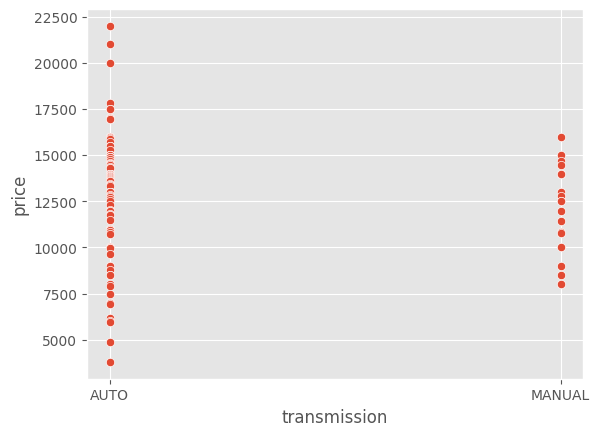

In [ ]:
sns.scatterplot(data=df, x= 'transmission',y='price')


<ipython-input-227-964b931f1b62>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True)


<Axes: >

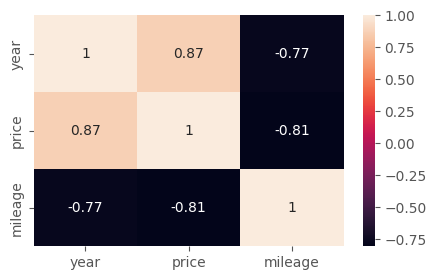

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(data=df.corr(), annot=True)

In [ ]:
print(df["model"].value_counts())
model= pd.get_dummies(df['model'], drop_first= True)


SE     78
SES    49
SEL    23
Name: model, dtype: int64


In [ ]:
print(df["color"].value_counts())
color= pd.get_dummies(df['color'], drop_first= True)

Black     35
Silver    32
Gray      25
Red       25
Blue      17
White     16
Name: color, dtype: int64


In [ ]:
df['transmission'].value_counts()
transmission= pd.get_dummies(df['transmission'], drop_first= True)

In [ ]:
df['year'].value_counts()
year = pd.get_dummies(df['year'], drop_first= True)

In [ ]:
df1 = pd.concat([df, model,year, color, transmission], axis = 1)
df1.drop(["model", "color", "year", "transmission"], axis = 1, inplace = True)



In [ ]:
df1.head()

,price,mileage,SEL,SES,2007,2008,2009,2010,2011,Blue,Gray,Red,Silver,White,MANUAL
0,21992,7413,1,0,0,0,0,0,1,0,1,0,0,0,0
1,20995,10926,1,0,0,0,0,0,1,0,1,0,0,0,0
2,19995,7351,1,0,0,0,0,0,1,0,0,0,1,0,0
3,17809,11613,1,0,0,0,0,0,1,0,1,0,0,0,0
4,17500,8367,0,0,0,0,0,0,1,0,0,0,0,1,0


<Axes: >

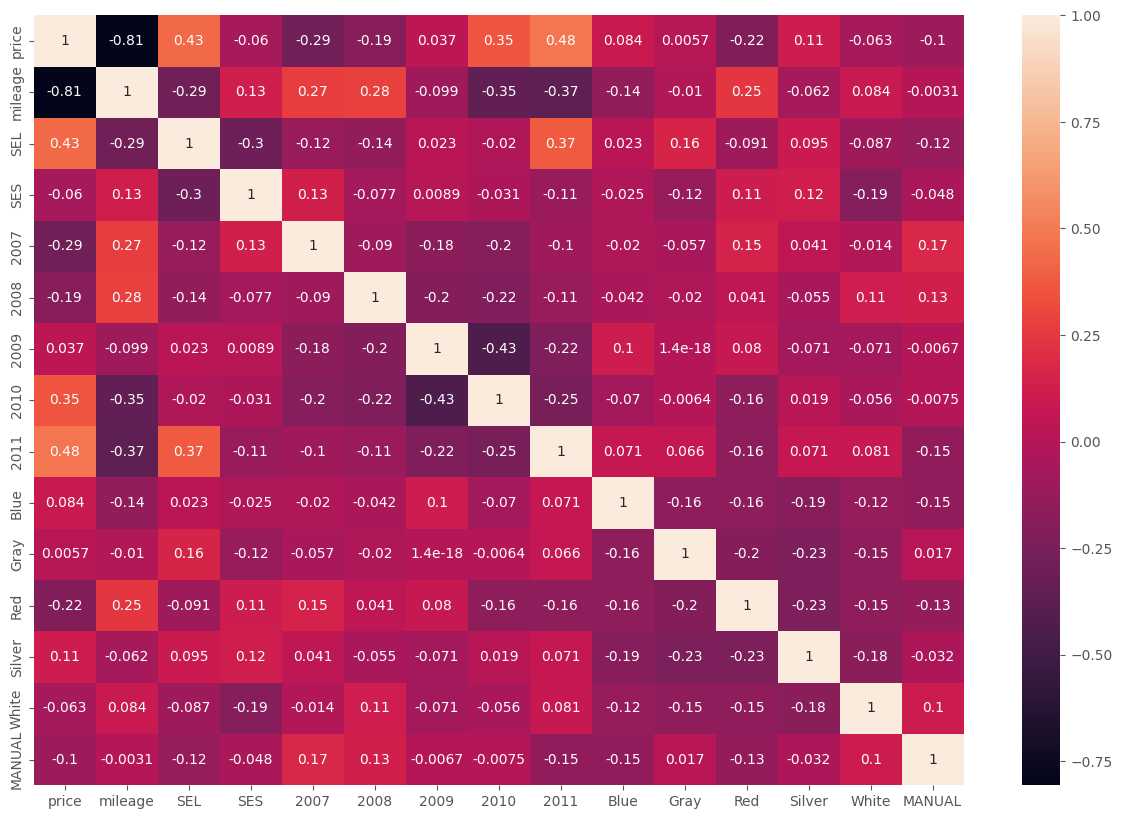

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df1.corr(), annot=True)

In [ ]:
df1[2008].value_counts()

0    136
1     14
Name: 2008, dtype: int64

In [ ]:
df1.columns

Index([  'price', 'mileage',     'SEL',     'SES',      2007,      2008,
            2009,      2010,      2011,    'Blue',    'Gray',     'Red',
        'Silver',   'White',  'MANUAL'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    150 non-null    int64
 1   mileage  150 non-null    int64
 2   SEL      150 non-null    uint8
 3   SES      150 non-null    uint8
 4   2007     150 non-null    uint8
 5   2008     150 non-null    uint8
 6   2009     150 non-null    uint8
 7   2010     150 non-null    uint8
 8   2011     150 non-null    uint8
 9   Blue     150 non-null    uint8
 10  Gray     150 non-null    uint8
 11  Red      150 non-null    uint8
 12  Silver   150 non-null    uint8
 13  White    150 non-null    uint8
 14  MANUAL   150 non-null    uint8
dtypes: int64(2), uint8(13)
memory usage: 4.4 KB


In [ ]:
x=df1.drop('price', axis=1)

In [ ]:
y=df1['price']

In [ ]:
x.head()

,mileage,SEL,SES,2007,2008,2009,2010,2011,Blue,Gray,Red,Silver,White,MANUAL
0,7413,1,0,0,0,0,0,1,0,1,0,0,0,0
1,10926,1,0,0,0,0,0,1,0,1,0,0,0,0
2,7351,1,0,0,0,0,0,1,0,0,0,1,0,0
3,11613,1,0,0,0,0,0,1,0,1,0,0,0,0
4,8367,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=7)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 14)
(45, 14)
(105,)
(45,)


In [ ]:
x_train=preprocessing.normalize(x_train)
x_test=preprocessing.normalize(x_test)

In [ ]:
model1=Sequential()

In [ ]:
opt=optimizers.Adam(learning_rate=0.01)

In [ ]:
model1.add(Dense(units=50, input_dim=14, kernel_initializer='normal', activation='relu'))

model1.add(Dense(units=50, kernel_initializer='normal', activation='relu'))

model1.add(Dense(units=50, kernel_initializer='normal', activation='relu'))

model1.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model1.compile(loss='mean_squared_error', optimizer=opt )

In [ ]:
model1.fit(x_train, y_train, batch_size= 32, epochs = 80, verbose=1, validation_data=(x_test,y_test))

Epoch 1/80
4/4 [==============================] - 2s 74ms/step - loss: 183559120.0000 - val_loss: 164012032.0000
Epoch 2/80
4/4 [==============================] - 0s 20ms/step - loss: 183553488.0000 - val_loss: 164000288.0000
Epoch 3/80
4/4 [==============================] - 0s 18ms/step - loss: 183535776.0000 - val_loss: 163968288.0000
Epoch 4/80
4/4 [==============================] - 0s 16ms/step - loss: 183491872.0000 - val_loss: 163893472.0000
Epoch 5/80
4/4 [==============================] - 0s 21ms/step - loss: 183390640.0000 - val_loss: 163737184.0000
Epoch 6/80
4/4 [==============================] - 0s 21ms/step - loss: 183189424.0000 - val_loss: 163438528.0000
Epoch 7/80
4/4 [==============================] - 0s 20ms/step - loss: 182812160.0000 - val_loss: 162903184.0000
Epoch 8/80
4/4 [==============================] - 0s 20ms/step - loss: 182147776.0000 - val_loss: 161997600.0000
Epoch 9/80
4/4 [==============================] - 0s 17ms/step - loss: 181023360.0000 - val_loss

In [ ]:
pd.DataFrame(model1.history.history)

,loss,val_loss
0,183559120.0,164012032.0
1,183553488.0,164000288.0
2,183535776.0,163968288.0
3,183491872.0,163893472.0
4,183390640.0,163737184.0
...,...,...
75,10485955.0,8685968.0
76,10358775.0,8324475.5
77,10314316.0,8059540.5
78,10474255.0,7945188.5


<Axes: >

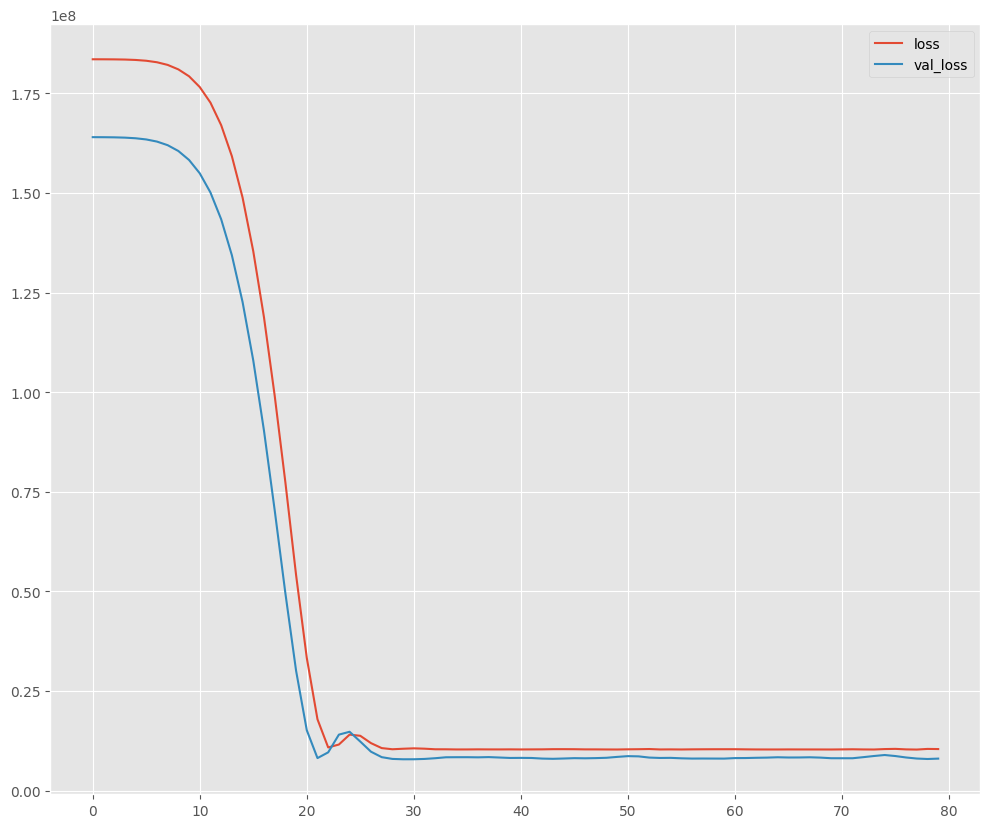

In [ ]:
plt.style.use("ggplot")
pd.DataFrame(model1.history.history).plot(figsize=(12,10))

In [ ]:
predictions = model1.predict(x_test)

2/2 [==============================] - 0s 4ms/step


In [ ]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 2100.240212673611
MSE: 8040190.185182932
RMSE: 2835.522912124487


In [ ]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,predictions)

0.000331201654901192

In [ ]:
!jupyter nbconvert --to html Neural_network.ipynb

[NbConvertApp] Converting notebook Neural_network.ipynb to html
[NbConvertApp] Writing 1287773 bytes to Neural_network.html
